In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
from scipy.optimize import curve_fit

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('covid19-26052020.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    80 non-null     object 
 1   cases   75 non-null     float64
 2   new     74 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [7]:
df['Date']= pd.to_datetime(df['Date']) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    80 non-null     datetime64[ns]
 1   cases   75 non-null     float64       
 2   new     74 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 KB


In [9]:
def fsigmoid( x, a, b, s, x0):
    return s / (1.0 + np.exp(-a*(x-b))) + x0

In [10]:
df = df.dropna(how='any',axis=0) 


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1 to 74
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    74 non-null     datetime64[ns]
 1   cases   74 non-null     float64       
 2   new     74 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.3 KB


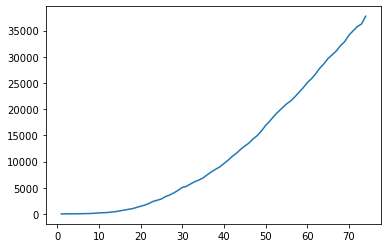

In [12]:
plt.plot( df.index, df['cases'])
plt.show()

In [13]:
popt, pcov = curve_fit( fsigmoid, df.index,df['cases'], method='lm')

<ipython-input-9-893445dfc87d>:2: RuntimeWarning: overflow encountered in exp
  return s / (1.0 + np.exp(-a*(x-b))) + x0


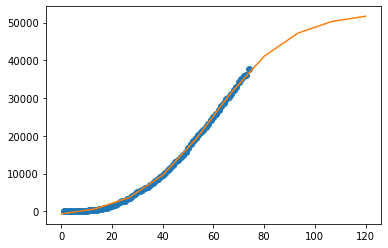

In [14]:
x = np.linspace(0,120,10)
y = fsigmoid(x,*popt)
plt.plot(df.index, df['cases'], 'o', label='data')
plt.plot(x,y, label='fit')
plt.show()

In [15]:
print( pcov )

[[ 1.64786180e-06 -6.65748125e-04 -1.38880249e+00  1.50563153e-01]
 [-6.65748125e-04  3.23875859e-01  6.29086483e+02 -4.99502830e+01]
 [-1.38880249e+00  6.29086483e+02  1.27593165e+06 -1.18847425e+05]
 [ 1.50563153e-01 -4.99502830e+01 -1.18847425e+05  1.82996181e+04]]


In [16]:
print ( popt )

[ 6.61845041e-02  6.03000931e+01  5.43491476e+04 -1.64827664e+03]
